# Mathematical Underpinnings - Lab 4

In [4]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

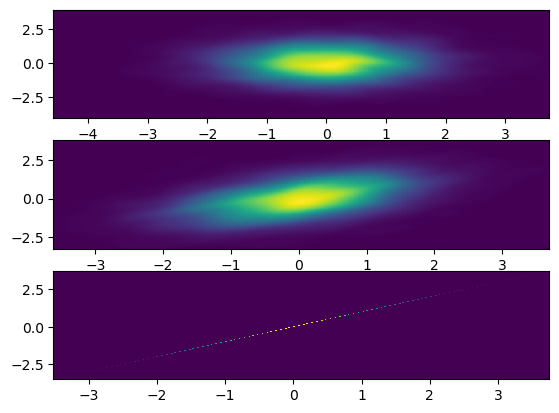

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [10]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

In [5]:
n = 1000
data0 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
data5 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
data1 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)

In [9]:
from sklearn.metrics import mutual_info_score

In [43]:
def compute_pearson_and_mi(data):
    p = pearsonr(data[:, 0], data[:, 1]).statistic

    bins0 = np.histogram(data[:, 0], 9)[1]
    labels0 = np.digitize(data[:, 0], bins0)

    bins1 = np.histogram(data[:, 1], 9)[1]
    labels1 = np.digitize(data[:, 1], bins1)

    mi = mutual_info_score(labels0, labels1)
    
    return p, mi

In [44]:
print("rho 0")
p, mi = compute_pearson_and_mi(data0)
print("Pearson statistic:", p)
print("MI:", mi)
print()

print("rho 0.5")
p, mi = compute_pearson_and_mi(data5)
print("Pearson statistic:", p)
print("MI:", mi)
print()

print("rho 1")
p, mi = compute_pearson_and_mi(data1)
print("Pearson statistic:", p)
print("MI:", mi)
print()

rho 0
Pearson statistic: -0.0790427019638655
MI: 0.03061557104946638

rho 0.5
Pearson statistic: 0.46617041523948655
MI: 0.14297888312620805

rho 1
Pearson statistic: 1.0
MI: 1.830130373158945



#### bp 3)

In [68]:
rhos = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
N = 100


results = []
for rho in rhos:
    for _ in range(N):
        data = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
        p, mi = compute_pearson_and_mi(data)
        results.append({"rho": rho, "pearson": p, "mi": mi})

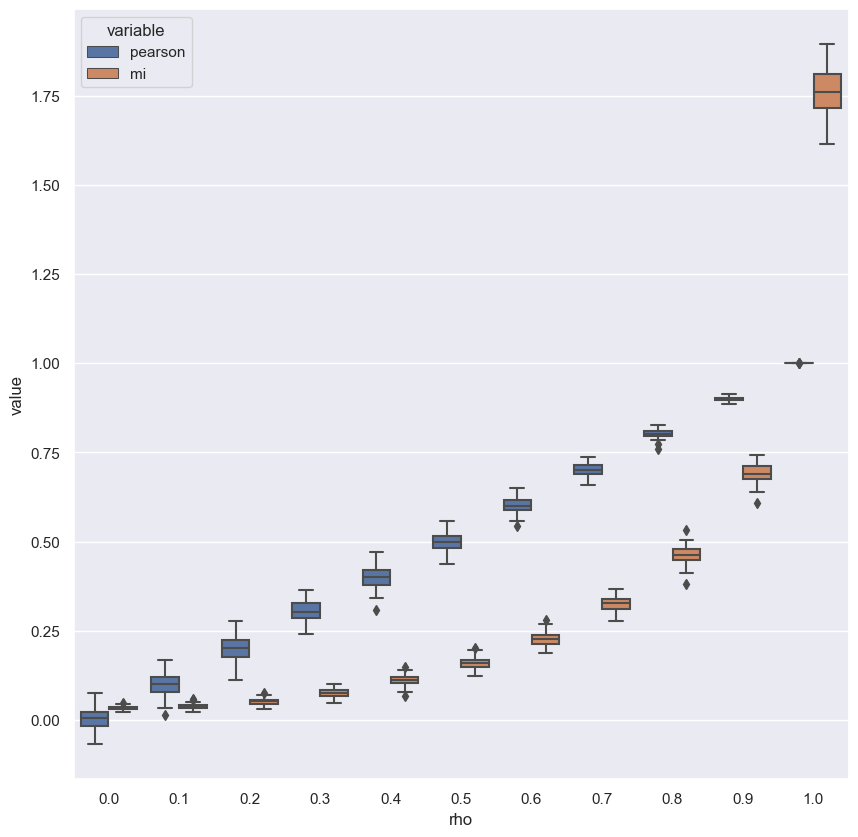

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

results_df = pd.DataFrame.from_records(results)
results_df_melted = results_df.melt(id_vars=["rho"], value_vars=["pearson", "mi"])

plt.figure(figsize=(10,10))
sns.boxplot(data=results_df_melted, x="rho", y="value", hue="variable")
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [70]:
results_df_agg = results_df.groupby("rho").mean().reset_index()
results_df_agg

,rho,pearson,mi
0,0.0,0.002962,0.033603
1,0.1,0.100575,0.038534
2,0.2,0.202081,0.052421
3,0.3,0.303542,0.075386
4,0.4,0.400596,0.111947
5,0.5,0.500683,0.159413
6,0.6,0.600640,0.227098
7,0.7,0.701508,0.326431
8,0.8,0.801661,0.462598
9,0.9,0.899603,0.692365


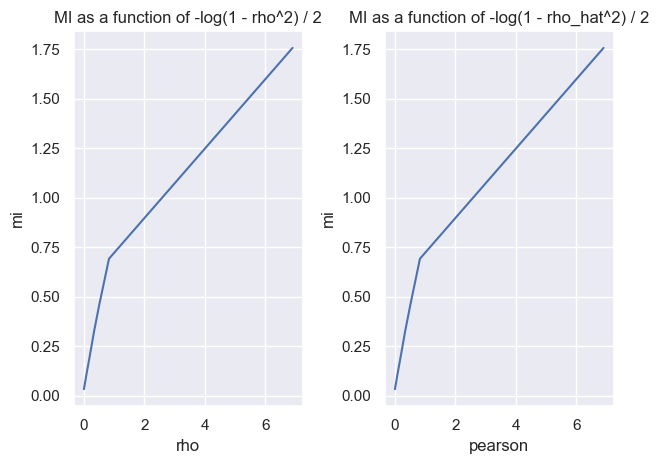

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.lineplot(x=-np.log(1 - np.square(results_df_agg["rho"]) + 1e-6) / 2, y=results_df_agg["mi"], ax=ax1)
ax1.set_title("MI as a function of -log(1 - rho^2) / 2")

sns.lineplot(x=-np.log(1 - np.square(results_df_agg["pearson"]) + 1e-6) / 2, y=results_df_agg["mi"], ax=ax2)
ax2.set_title("MI as a function of -log(1 - rho_hat^2) / 2")

plt.tight_layout()
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

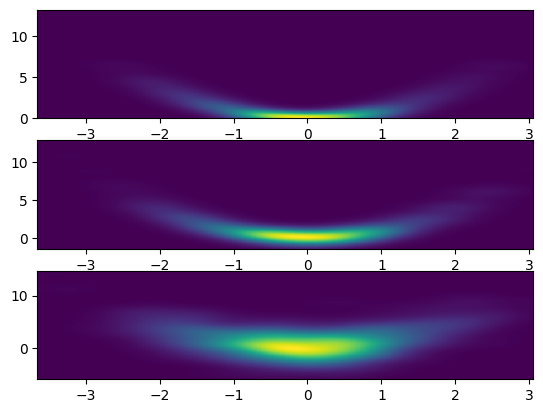

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [78]:
sigmas = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

for sigma in sigmas:
    x = np.random.normal(0, 1, n)
    data = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
    p, mi = compute_pearson_and_mi(data)
    print("sigma:", sigma)
    print("Pearson correlation:", p)
    print("MI:", mi)
    print()

sigma: 0
Pearson correlation: -0.05882731292511309
MI: 0.7162022049567612

sigma: 0.2
Pearson correlation: 0.15163371430940842
MI: 0.62476088712313

sigma: 0.4
Pearson correlation: 0.014735145341807279
MI: 0.6266615997454622

sigma: 0.6
Pearson correlation: 0.07627873670354726
MI: 0.442555889754189

sigma: 0.8
Pearson correlation: 0.10326595282811146
MI: 0.4580439780099911

sigma: 1
Pearson correlation: -0.013082718680373293
MI: 0.3520669837055924

sigma: 1.2
Pearson correlation: -0.026076662097996355
MI: 0.28568810706443026

sigma: 1.4
Pearson correlation: -0.006267438961420811
MI: 0.23369270314024626

sigma: 1.6
Pearson correlation: -0.03981459611281757
MI: 0.2155036067566803

sigma: 1.8
Pearson correlation: 0.06086220963904322
MI: 0.22040995920668674

sigma: 2
Pearson correlation: -0.010300648335592454
MI: 0.15091249922513694



In [79]:
N = 100
results_b = []
for sigma in sigmas:
    for _ in range(N): 
        x = np.random.normal(0, 1, n)
        data = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
        p, mi = compute_pearson_and_mi(data)
        results_b.append({"sigma": sigma, "pearson": p, "mi": mi})

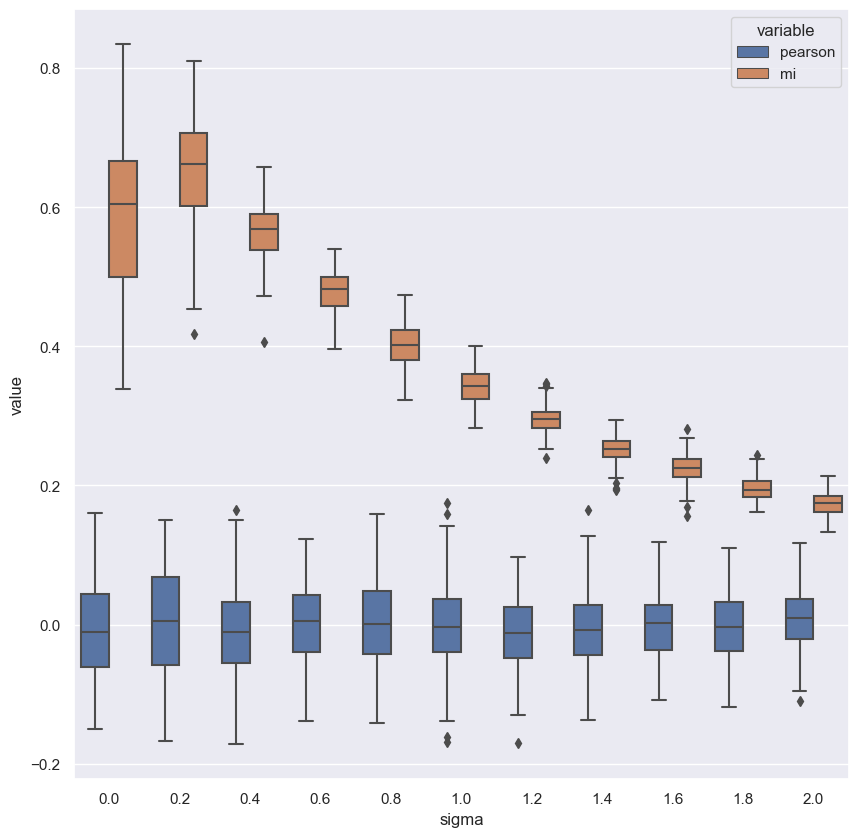

In [81]:
results_b_df = pd.DataFrame.from_records(results_b)
results_b_df_melted = results_b_df.melt(id_vars=["sigma"], value_vars=["pearson", "mi"])

plt.figure(figsize=(10,10))
sns.boxplot(data=results_b_df_melted, x="sigma", y="value", hue="variable")
plt.show()

## Task 2

### a)

In [30]:
def indep_test_asymptotic(X, Y, stat):
    binsX = np.histogram(X, 20)[1]
    X = np.digitize(X, binsX)

    binsY = np.histogram(Y, 20)[1]
    Y = np.digitize(Y, binsY)

    if stat == "mi":
        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [31]:
def indep_test_permutation(X, Y, B):
    binsX = np.histogram(X, 20)[1]
    X = np.digitize(X, binsX)

    binsY = np.histogram(Y, 20)[1]
    Y = np.digitize(Y, binsY)

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [33]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
n = 1000
independent = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
X = independent[:, 0]
Y = independent[:, 1]

print("asymptotic test based on MI:", indep_test_asymptotic(X, Y, "mi"))
print("Pearson’s chi-squared test:", indep_test_asymptotic(X, Y, "chi2"))
print("permutation test:", indep_test_permutation(X, Y, B=100))

asymptotic test based on MI: (268.2417589781345, 0.9999070557880189)
Pearson’s chi-squared test: (279.99634880588656, 0.9993387429038468)
permutation test: (268.2417589781345, 0.594059405940594)


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [34]:
# dependent r.v. - ideally we will reject the null hypothesis
dependent = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
X = dependent[:, 0]
Y = dependent[:, 1]

print("asymptotic test based on MI:", indep_test_asymptotic(X, Y, "mi"))
print("Pearson’s chi-squared test:", indep_test_asymptotic(X, Y, "chi2"))
print("permutation test:", indep_test_permutation(X, Y, B=100))

asymptotic test based on MI: (544.2359827736946, 1.1267987654051126e-09)
Pearson’s chi-squared test: (976.0175033778801, 0.0)
permutation test: (544.2359827736946, 0.009900990099009901)
